# Projet analyse de données:
Réalisé par:
   .SAKOUAT Khadija:IFA2
   .AIT LHAJ Abdelilah:IRISI2




# Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Introduction
Ce jeu de données contient des informations sur des demandes de prêt, comprenant diverses caractéristiques démographiques et financières des demandeurs.

In [80]:
# Lire le fichier Excel
df = pd.read_excel("train (1).xlsx")
# df.head permet de voir les premières lignes chargées de notre fichier Excel
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0         128               360   
1             3000                0.0          66               360   
2             2583             2358.0         120               360   
3             6000                0.0         141               360   
4             5417             4196.0         267               360   

   Credit_History Property_Area Loan_Status  
0               1         Rural           N  
1               1         Urban           Y  
2               1   

# Regression Simple 
 .L'objectif de cette analyse est de déterminer si le revenu du demandeur (ApplicantIncome) a une influence significative sur le   montant du prêt (LoanAmount) en utilisant une régression linéaire simple. Nous cherchons à établir s'il existe une relation     linéaire entre ces deux variables.

In [81]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [82]:
# Récupérer le prix : les valeurs observées pour la variable Cible
y = df['ApplicantIncome']
# Récupérer les variables prédictives : La superficie en pieds² et le nb chambre
X = df['LoanAmount']
# Ajouter une constante à la variable indépendante (prédicteur) X
X = sm.add_constant(X)

# Vérifier les valeurs manquantes
print(X.isnull().sum())
print(y.isnull().sum())

# Remplacer les valeurs manquantes dans X par la moyenne
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)  # Remplacer les valeurs manquantes dans y si nécessaire

# Ajuster le modèle de régression linéaire simple
model = sm.OLS(y, X).fit()

# Afficher un résumé des résultats de la régression
print(model.summary())

const         0
LoanAmount    0
dtype: int64
0
                            OLS Regression Results                            
Dep. Variable:        ApplicantIncome   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     210.9
Date:                Sat, 25 May 2024   Prob (F-statistic):           4.23e-40
Time:                        22:12:42   Log-Likelihood:                -4967.3
No. Observations:                 500   AIC:                             9939.
Df Residuals:                     498   BIC:                             9947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

# Interprétation
 .Le coefficient de détermination R-carré est de 0,298, ce qui signifie que le modèle explique environ 29,8% de la variabilité     de la variable ApplicantIncome (revenu du demandeur).
  .La statistique F de 210,9 avec une p-value très faible (4,23e-40) indique que le modèle est globalement significatif et que      la variable LoanAmount a un pouvoir explicatif non nul sur ApplicantIncome.
  .Le coefficient de la variable LoanAmount est de 39,0388 avec une p-value de 0,000. Cela signifie que le montant du prêt a un   effet positif et statistiquement significatif sur le revenu du demandeur. Plus précisément, une augmentation de 1 unité du       montant de prêt est associée à une augmentation moyenne de 39,0388 unités du revenu du demandeur, toutes choses étant égales     par ailleurs.
  Il existe une relation linéaire positive et statistiquement significative entre le revenu du demandeur (ApplicantIncome) et le   montant du prêt (LoanAmount). Plus le montant du prêt est élevé, plus le revenu du demandeur tend à être élevé, en moyenne.

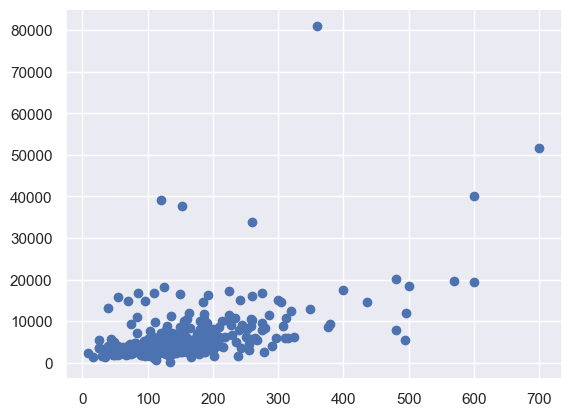

In [83]:
X_no_const = df['LoanAmount']
plt.scatter(X_no_const, y)
plt.show()

# Interprétation
 .La majorité des individus se concentrent en bas à gauche du graphique, ce qui indique que la plupart des demandeurs ont des     revenus relativement bas (moins de 20 000) et demandent des prêts de montants relativement faibles (moins de 200).

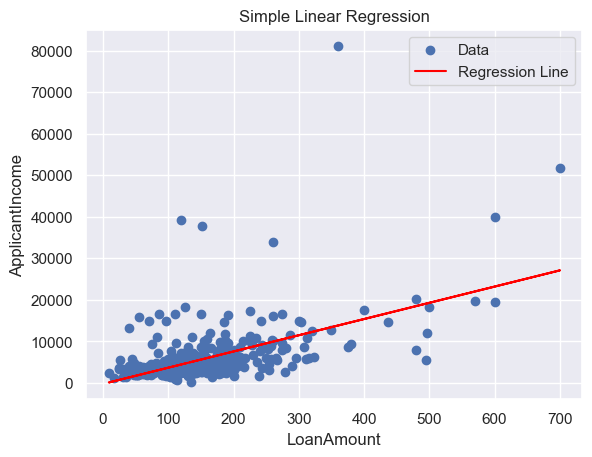

In [84]:
# Tracer le nuage de points avec la droite de régression
plt.scatter(X['LoanAmount'], y, label='Data')  # Nuage de points des données

# Prédire les valeurs de y (Current Price) en utilisant le modèle
y_pred = model.predict(X)
plt.plot(X['LoanAmount'], y_pred, color='red', label='Regression Line')  # Droite de régression

plt.xlabel('LoanAmount')
plt.ylabel('ApplicantIncome')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

# Interprétation
 .Il existe une association positive entre le montant du prêt et le revenu du demandeur. Les personnes ayant des revenus plus     élevés tendent à obtenir des prêts plus importants.

# Regression_Multiple
 .L'objectif de cette analyse est de déterminer comment le revenu du demandeur (ApplicantIncome) et la durée du prêt               (Loan_Amount_Term) influencent collectivement le montant du prêt (LoanAmount) dans les demandes de prêt en utilisant une         régression linéaire multiple. Cette approche permet d'évaluer l'impact combiné de ces deux variables sur le montant du prêt,     fournissant ainsi une meilleure compréhension des facteurs déterminants dans l'approbation des prêts.

In [10]:
# Sélectionner les variables pertinentes pour la régression multiple
X = df[['ApplicantIncome', 'Loan_Amount_Term']]  # Variables indépendantes (predicteurs)
y = df['LoanAmount']  # Variable dépendante (réponse)

In [11]:
# Ajouter une constante à la variable indépendante (prédicteur) X
X = sm.add_constant(X)

# Vérifier les valeurs manquantes
print(X.isnull().sum())
print(y.isnull().sum())

# Remplacer les valeurs manquantes dans X par la moyenne
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)  # Remplacer les valeurs manquantes dans y si nécessaire

# Ajuster le modèle de régression linéaire simple
model = sm.OLS(y, X).fit()

# Afficher un résumé des résultats de la régression
print(model.summary())

const               0
ApplicantIncome     0
Loan_Amount_Term    0
dtype: int64
0
                            OLS Regression Results                            
Dep. Variable:             LoanAmount   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     106.5
Date:                Sat, 25 May 2024   Prob (F-statistic):           3.19e-39
Time:                        19:56:20   Log-Likelihood:                -2831.1
No. Observations:                 500   AIC:                             5668.
Df Residuals:                     497   BIC:                             5681.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

# Interprétation
 .R-carré : 0,300. Cette valeur indique que le modèle explique 30% de la variance du montant du prêt (LoanAmount). régression   OLS semble être statistiquement significatif pour expliquer le montant du prêt (LoanAmount). Le revenu du demandeur a une       relation positive et significative avec le montant du prêt,

In [12]:
# Fonction de prédiction du montant du prêt (LoanAmount) à partir de ApplicantIncome et Loan_Amount_Term
def predict_loan_amount(applicant_income, loan_amount_term):
    # Extraire les coefficients du modèle
    beta_0 = model.params['const']
    beta_1 = model.params['ApplicantIncome']
    beta_2 = model.params['Loan_Amount_Term']

    # Calculer la prédiction du montant du prêt (LoanAmount) en utilisant les coefficients du modèle
    predicted_loan_amount = beta_0 + beta_1 * applicant_income + beta_2 * loan_amount_term
    return predicted_loan_amount

# Exemple d'utilisation de la fonction de prédiction
applicant_income = 5000  # Exemple de revenu du demandeur
loan_amount_term = 360  # Exemple de durée du prêt en mois

predicted_loan_amount = predict_loan_amount(applicant_income, loan_amount_term)
print("Prédiction du montant du prêt (LoanAmount) :", predicted_loan_amount)

Prédiction du montant du prêt (LoanAmount) : 142.7880579212816


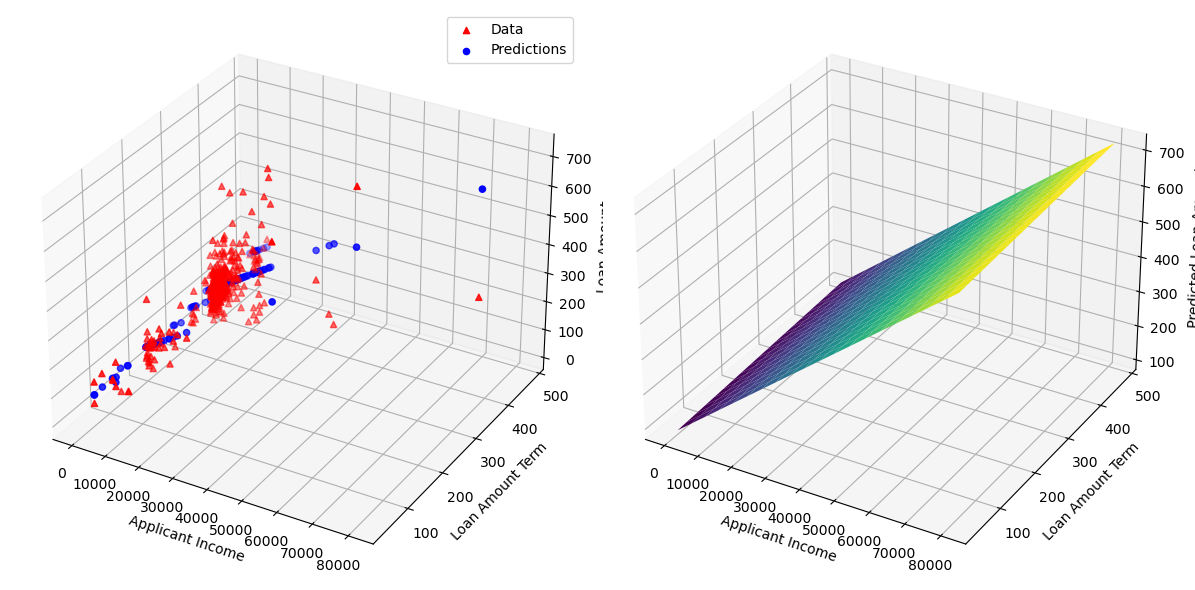

In [13]:
# Prédire le montant du prêt pour toutes les observations dans le jeu de données
predicted_loan_amounts = []
for idx, row in df.iterrows():
    predicted_amount = predict_loan_amount(row['ApplicantIncome'], row['Loan_Amount_Term'])
    predicted_loan_amounts.append(predicted_amount)

# Créer une figure pour afficher les graphiques en 3D
fig = plt.figure(figsize=(12, 6))

# Premier sous-trace : Afficher les données réelles et les prédictions
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(df['ApplicantIncome'], df['Loan_Amount_Term'], df['LoanAmount'], c='r', marker='^', label='Data')
ax1.scatter(df['ApplicantIncome'], df['Loan_Amount_Term'], predicted_loan_amounts, c='b', marker='o', label='Predictions')
ax1.set_xlabel('Applicant Income')
ax1.set_ylabel('Loan Amount Term')
ax1.set_zlabel('Loan Amount')
ax1.legend()

# Deuxième sous-trace : Afficher la surface de prédiction en 3D
# Créer une grille de points pour la surface de prédiction
income_grid, term_grid = np.meshgrid(np.linspace(df['ApplicantIncome'].min(), df['ApplicantIncome'].max(), 20),
                                     np.linspace(df['Loan_Amount_Term'].min(), df['Loan_Amount_Term'].max(), 20))
predicted_loan_grid = predict_loan_amount(income_grid.flatten(), term_grid.flatten())
predicted_loan_grid = np.array(predicted_loan_grid).reshape(income_grid.shape)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(income_grid, term_grid, predicted_loan_grid, cmap='viridis')
ax2.set_xlabel('Applicant Income')
ax2.set_ylabel('Loan Amount Term')
ax2.set_zlabel('Predicted Loan Amount')

# Afficher la figure
plt.tight_layout()
plt.show()

# Interprétation
 .Le premier sous-graphique montre le nuage de points des données réelles (points rouges) et les valeurs prédites par le modèle   (points bleus). On peut constater une corrélation positive entre le revenu et le montant du prêt, ainsi qu'une distribution     assez dispersée des points.                                                                                                     .Le deuxième sous-graphique représente la surface de prédiction du modèle en utilisant une grille de   valeurs pour le revenu   et la durée du prêt.

# ANOVA à 1 facteur
 .L'objectif de cette analyse est de déterminer s'il existe une variation significative du revenu moyen des demandeurs entre les   différentes zones de propriété (Property_Area) en utilisant l'analyse de la variance.

In [16]:
import statsmodels.formula.api as smf
import seaborn as sns

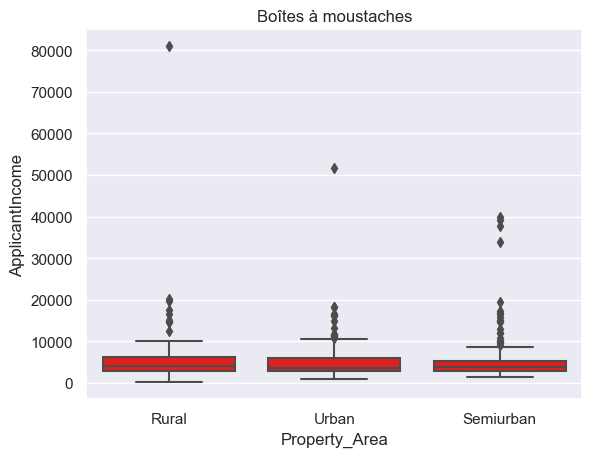

In [17]:
sns.set()

ax = sns.boxplot(x="Property_Area", y="ApplicantIncome", data=df, color='red')
plt.xlabel('Property_Area')
plt.ylabel('ApplicantIncome')
plt.title('Boîtes à moustaches')
plt.show()

# Interprétation
 Interprétation:

Le diagramme en boîtes montre que Property_Area n'a pas d'effet sur ApplicationIncome, car les box plan sont au même niveau.

In [18]:
anova_Property_Area = smf.ols('ApplicantIncome~Property_Area', data=df).fit()
sm.stats.anova_lm(anova_Property_Area)

,df,sum_sq,mean_sq,F,PR(>F)
Property_Area,2.0,1.747295e+07,8.736475e+06,0.24496,0.78283
Residual,497.0,1.772543e+10,3.566485e+07,NaN,NaN


# Interprétation
 . Les résultats montrent que la statistique F est 0.24496 et la valeur p est 0.78283. Une valeur p de 0.78283, qui est bien       supérieure à 0.05, indique qu'il n'y a pas de différence statistiquement significative du revenu moyen des demandeurs entre     les différentes zones de propriété. En d'autres termes selon cette analyse la zone de propriété n'a pas d'effet significatif     sur le revenu du demandeur.

# ANOVA 2 facteurs
  .L'objectif de cette analyse est de déterminer comment l'éducation (Education) et la zone de propriété (Property_Area)           influencent le revenu des demandeurs (ApplicantIncome) en utilisant une ANOVA à deux facteurs.

In [19]:
anova_Property_Area_Education= smf.ols('ApplicantIncome~Property_Area+Education', data=df).fit()
sm.stats.anova_lm(anova_Property_Area_Education)

,df,sum_sq,mean_sq,F,PR(>F)
Property_Area,2.0,1.747295e+07,8.736475e+06,0.249038,0.779648
Education,1.0,3.252931e+08,3.252931e+08,9.272651,0.002450
Residual,496.0,1.740014e+10,3.508092e+07,NaN,NaN


# Interprétation
 .L'analyse montre que la zone de propriété (Property_Area) n'a pas d'effet significatif sur le revenu des demandeurs, tandis     que l'éducation (Education) a un effet significatif. En d'autres termes, bien que le lieu de résidence ne semble pas             influencer le revenu, le niveau d'éducation des demandeurs est un facteur important qui influence leur revenu.

# ANOVA à 2 facteurs avec interaction

In [20]:
anova_Property_Area_Education = smf.ols('ApplicantIncome~Property_Area*Education', data=df).fit()
sm.stats.anova_lm(anova_Property_Area_Education)

,df,sum_sq,mean_sq,F,PR(>F)
Property_Area,2.0,1.747295e+07,8.736475e+06,0.248207,0.780295
Education,1.0,3.252931e+08,3.252931e+08,9.241726,0.002491
Property_Area:Education,2.0,1.217255e+07,6.086274e+06,0.172914,0.841261
Residual,494.0,1.738796e+10,3.519831e+07,NaN,NaN


#Interaction:
 Il n'y a pas d'interaction significative entre Property_Area et Education (p-value = 0.841261). Cela signifie que l'effet de Education sur ApplicantIncome est constant quel que soit la valeur de Property_Area, car il ya pas d'effet de Property_Area car p-value =  0.841261>0.05

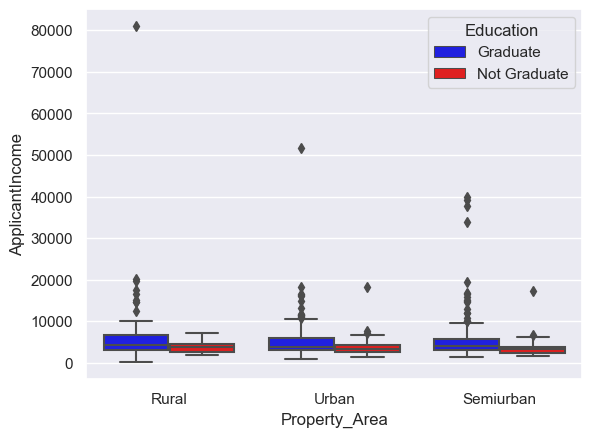

In [21]:
ax=sns.boxplot(x="Property_Area", y="ApplicantIncome", hue="Education", data=df, palette={"Graduate": "blue", "Not Graduate": "red"})
plt.show()

# Interprétation
 D'après le diagramme en boîtes à moustaches, on peut dire que Property_Area n'a pas d'effet sur le revenu des demandeurs, car les boîtes à moustaches sont au même niveau. En revanche, l'éducation a un effet sur ApplicationIncome, car les boîtes à moustaches ne sont pas au même niveau.

# ACP
 .L'objectif de cette analyse est de déterminer quelles combinaisons de variables expliquent le mieux la variance dans les         données en utilisant l'analyse en composantes principales.

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [23]:
# Sélectionnez uniquement les colonnes numériques
numerical_columns = df.select_dtypes(include=['number']).columns

#Remplissez les valeurs manquantes avec la moyenne pour les colonnes numériques
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

qualitative_columns = [ 'Dependents','Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
df = df.drop(columns=qualitative_columns)
df.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128,360,1
1,3000,0.0,66,360,1
2,2583,2358.0,120,360,1
3,6000,0.0,141,360,1
4,5417,4196.0,267,360,1


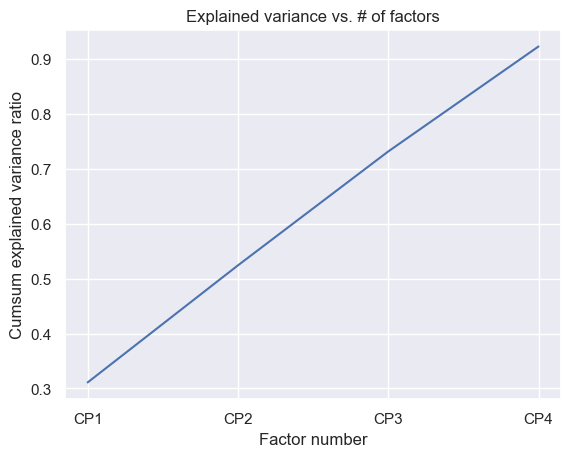

array([0.31080043, 0.2133959 , 0.2076312 , 0.1914182 ])

In [24]:
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(df)
#instanciation
acp = PCA()
#Coordonées dans le nouvel espace
coord = acp.fit_transform(Z)
# Cumul de variance expliquée
list_acp = ["CP1", "CP2", "CP3","CP4"]
plt.plot(list_acp, np.cumsum(acp.explained_variance_ratio_[:4]))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()
acp.explained_variance_ratio_[:4]

# Interprétation


D'après l'analyse du graphique à dispersion, on peut conclure que les quatre CP facteurs expliquent une grande partie de la variance des données. L'ajout de facteurs supplémentaires explique de moins en moins de variance, ce qui suggère que les quatre  facteurs sont les plus importants pour expliquer les données.

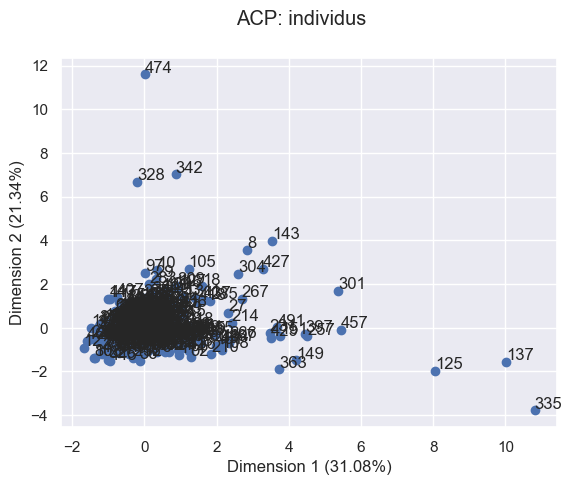

In [25]:
#Tracé d'un graphique de dispersion
plt.scatter(coord[:,0],coord[:,1])

#Poucentage des axes
pr1=acp.explained_variance_ratio_[0]/np.sum(acp.explained_variance_ratio_)
pr1=round(pr1*100,2)
pr2=acp.explained_variance_ratio_[1]/np.sum(acp.explained_variance_ratio_)
pr2=round(pr2*100,2)


#Boucle pour l'annotation de tous les points
for i in range(len(coord)):
    plt.annotate(df.index[i],(coord[i,0],coord[i,1] + 0.1))
plt.xlabel("Dimension 1 ({}%)".format(pr1)) # modification du nom de l'axe X
plt.ylabel("Dimension 2 ({}%)".format(pr2)) # idem pour axe Y
plt.suptitle("ACP: individus") # titre général
plt.show()

# Interprétation
 .D'après l'analyse du graphique , on peut conclure que les dimensions 1 et 2 capturent une grande partie de la variabilité des   données. La dimension 1 semble être plus importante que la dimension 2, car elle explique une plus grande proportion de la       variance totale des données.

In [26]:
#contributions aux axes

ctr = coord**2
for j in range(4):
    ctr[:,j] = ctr[:,j]/np.sum(ctr[:,j])

df_ctr_cp1cp2 = pd.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})
df_ctr_cp1cp2

,id,CTR_1,CTR_2
0,0,9.973204e-05,0.000014
1,1,1.381428e-03,0.000489
2,2,3.953115e-04,0.000399
3,3,2.799754e-06,0.000441
4,4,1.514682e-03,0.003179
...,...,...,...
495,495,1.299666e-03,0.000460
496,496,1.785320e-03,0.002693
497,497,1.726591e-03,0.000119
498,498,3.619933e-04,0.000393


# Interprétation
 .D'après l'analyse du tableau, on peut conclure que les variables CTR_1 et CTR_2 sont les plus importantes pour expliquer la     variance des données dans les dimensions 1 et 2. Cela suggère que ces variables sont les plus discriminantes pour distinguer     les individus les uns des autres.

In [27]:
#qualité de représentation des individus - COS2
di = np.sum(coord**2,axis=1)
cos2 = coord**2
for j in range(4):
    cos2[:,j] = cos2[:,j]/di
df_ctr_12 = pd.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})
df_ctr_12

,id,COS2_1,COS2_2
0,0,0.251260,0.024026
1,1,0.637869,0.154985
2,2,0.469122,0.325404
3,3,0.003438,0.372190
4,4,0.342541,0.493637
...,...,...,...
495,495,0.636532,0.154626
496,496,0.161617,0.167358
497,497,0.558137,0.026481
498,498,0.278470,0.207684


# Interprétation
 .D'après l'analyse du tableau, on peut conclure que la plupart des individus sont bien représentés dans l'espace des             composantes principales car La plupart des individus ont un COS2 supérieur à 0,2. Cela signifie que les deux premières           composantes principales capturent une grande partie de la variabilité des données et que les individus sont bien distingués     les uns des autres dans cet espace.

In [28]:
acp.explained_variance_

array([1.55711639, 1.06911773, 1.04023645, 0.95900903, 0.38454043])

# Interprétation
ces valeurs de variance expliquée montrent l'importance relative de chaque composante donnc on peut dire que les 3 premier composent ce sont les plus important .

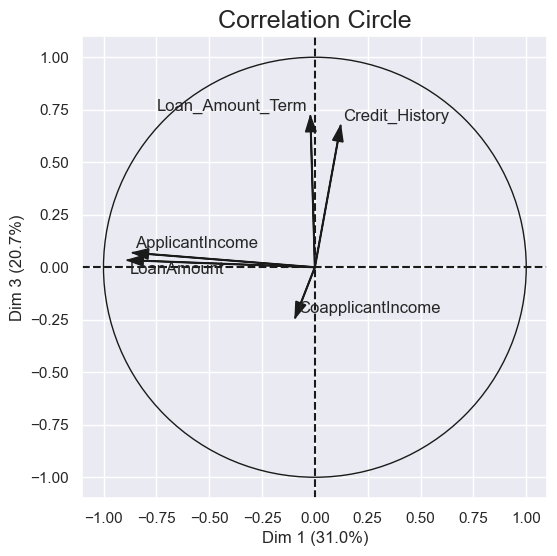

In [29]:
#!pip install mlxtend
from mlxtend.plotting import plot_pca_correlation_graph
figure, correlation_matrix = plot_pca_correlation_graph(Z,
                                                        df.columns.values,
                                                        dimensions=(1, 3),
                                                        figure_axis_size=6)

# Interprétation 


D'après l'analyse du cercle de corrélation, on peut conclure que le montant du prêt est fortement corrélé à a le revenu de demendeur et à l'historique de crédit positivement l'axe 2 et negativement avec laxe1.
 le montant du prêt et l'historique de crédit sont situés près l'un de l'autre sur l'axe positif de la première composante principale. Cela indique que ces deux variables sont fortement corrélées positivement
 -On observe que l'historique de crédit est positivement corrélé avec les axes 1 et 2, tandis que le revenu du co-emprunteur (CoapplicantIncome) est négativement corrélé avec ces mêmes axes. En d'autres termes, lorsque l'historique de crédit est bon, le revenu du co-emprunteur a tendance à être plus élevé, et inversement.
 

# AFC
 .L'objectif de cette analyse est d'examiner la relation entre l'état matrimonial (Married) et le statut du prêt (Loan_Status).

In [33]:
# Lire le fichier Excel
data = pd.read_excel("train (1).xlsx")
# Vérifier les valeurs manquantes
missing_values = data.isnull().sum()
print("Valeurs manquantes par colonne:\n", missing_values)

Valeurs manquantes par colonne:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [34]:
# Définir 'Loan_Status' comme l'index
df = data.set_index("Loan_Status")
# Convertir toutes les colonnes en valeurs numériques, en forçant les erreurs à NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
 # Imprimer les types de données après la conversion
print("Types de données après conversion :\n", df.dtypes)

Types de données après conversion :
 Loan_ID              float64
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area        float64
dtype: object


In [35]:
# Remplacer les valeurs infinies par NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Vérifier les valeurs infinies après le remplacement
print("Valeurs infinies par colonne après remplacement:\n", np.sum(~np.isfinite(df.values), axis=0))

Valeurs infinies par colonne après remplacement:
 [500 500 500  43 500 500   0   0   0   0   0 500]


In [36]:
# Vérifier les valeurs NaN après la conversion
nan_mask = np.isnan(df.values)
print("Valeurs NaN par colonne après conversion:\n", np.sum(nan_mask, axis=0))

Valeurs NaN par colonne après conversion:
 [500 500 500  43 500 500   0   0   0   0   0 500]


In [37]:
# Supprimer les colonnes avec plus de 20% de valeurs NaN
threshold = 0.2
df = df.loc[:, df.isnull().mean() < threshold]
# Remplacer les valeurs NaN : colonnes numériques par la moyenne, catégorielles par le mode
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)
# Vérifier les valeurs NaN après le remplissage
nan_mask_after = np.isnan(df.values)
print("Valeurs NaN par colonne après remplissage:\n", np.sum(nan_mask_after, axis=0))

Valeurs NaN par colonne après remplissage:
 [0 0 0 0 0 0]


In [38]:
# Supprimer les lignes contenant des valeurs NaN restantes
df.dropna(inplace=True)
# Vérifier qu'il n'y a plus de valeurs NaN
nan_mask_final = np.isnan(df.values)
print("Valeurs NaN par colonne après tentative de remplissage final:\n", np.sum(nan_mask_final, axis=0))

Valeurs NaN par colonne après tentative de remplissage final:
 [0 0 0 0 0 0]


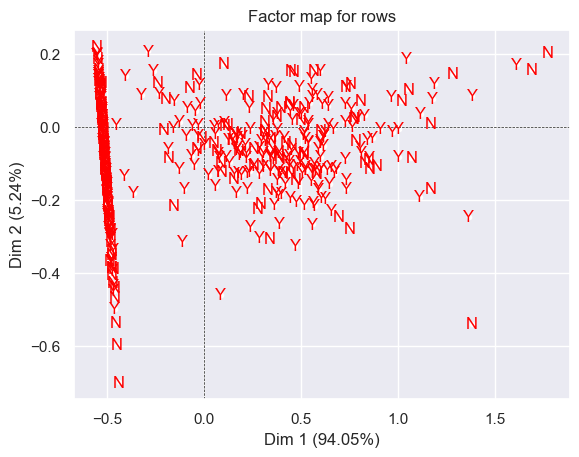

In [40]:
from fanalysis.ca import CA
# Supprimer les colonnes avec une faible variance
variances = df.var()
low_variance_cols = variances[variances == 0].index
df.drop(columns=low_variance_cols, inplace=True)
# Définir les données à utiliser dans l'AC
interested_data = df
# Créer une instance de la classe CA
afc = CA(row_labels=interested_data.index.values, col_labels=interested_data.columns.values, stats=True)
# Exécuter l'analyse de correspondance
try:
    afc.fit(interested_data.values)

    # Vérifier si les coordonnées des lignes sont calculées
    if hasattr(afc, 'row_coord_') and afc.row_coord_.size > 0:
        # Tracer la cartographie des lignes
        afc.mapping_row(num_x_axis=1, num_y_axis=2)
    else:
        print("Error: row_coord_ is not populated. Ensure the CA analysis was successful.")
except Exception as e:
    print(f"An error occurred during CA analysis: {e}")

# Interprétation
 .Dim 1 (94.05%) capture la majorité de la variance totale des données, expliquant 94.05% de l'information. Dim 2 (5.24%)         capture 5.24% de la variance totale ajoutant des variations dans les données qui ne sont pas expliquées par Dim 1.Ces           variations peuvent inclure des différences subtiles dans les caractéristiques des demandes de prêt qui contribuent à la         distinction entre les prêts approuvés et refusés. Bien que Dim 1 capture une grande partie de la variance, il n'y a pas de       séparation nette entre les points "Y" et "N". Cela signifie que les deux premières dimensions identifiées par l'analyse de       correspondance ne permettent pas de discriminer clairement entre les prêts approuvés et refusés. Les points sont concentrés     autour du centre du graphique, suggérant que la plupart des observations partagent des caractéristiques communes et sont         relativement similaires les unes aux autres. Cependant, quelques points "N" se trouvent loin du centre, indiquant des           caractéristiques distinctes ou atypiques.

# AFD
 .L'objectif de cette analyse est de déterminer si l'approbation d'un prêt (variable cible) peut être prédite en utilisant les     variables disponibles (caractéristiques des demandeurs de prêt). Pour cela, nous avons utilisé l'Analyse Factorielle             Discriminante.

In [41]:
np.set_printoptions(precision=4)
sns.set()
from sklearn.preprocessing import LabelEncoder

In [55]:
# Lire le fichier Excel
df = pd.read_excel("train (1).xlsx")
# df.head permet de voir les premières lignes chargées de notre fichier Excel
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0         128               360   
1             3000                0.0          66               360   
2             2583             2358.0         120               360   
3             6000                0.0         141               360   
4             5417             4196.0         267               360   

   Credit_History Property_Area Loan_Status  
0               1         Rural           N  
1               1         Urban           Y  
2               1   

In [57]:
#préparation des données
df['Dependents'] = df['Dependents'].replace('3+', '3')
# Convertir la colonne 'Dependents' en numérique
df['Dependents'] = df['Dependents'].astype(int)
# Convertir les colonnes catégorielles en chaînes de caractères
df['Dependents'] = df['Dependents'].astype(str)

# Sélectionner les colonnes pertinentes pour l'encodage
X_categorical = df.select_dtypes(include=['object'])

# Convertir les colonnes catégorielles en numériques avec LabelEncoder
label_encoders = {}
for column in X_categorical.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print(df)

     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          0       1        1           1          0              0   
1          1       1        1           0          0              1   
2          2       1        1           0          1              0   
3          3       1        0           0          0              0   
4          4       1        1           2          0              1   
..       ...     ...      ...         ...        ...            ...   
495      495       0        0           0          0              0   
496      496       1        1           3          0              0   
497      497       1        1           1          0              0   
498      498       1        1           2          0              0   
499      499       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583             1508.0         128               360   
1

In [58]:
#Codage...
le = LabelEncoder()
y = le.fit_transform(df['Loan_Status'])
# Séparer les caractéristiques (X) et la cible (y)
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)  # Exclure 'Loan_ID' et 'Loan_Status' de X
y = df['Loan_Status']
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)
lda.explained_variance_ratio_

array([1.])

# Interprétation
 .Un ratio de [1.0] signifie que la première composante de l'analyse discriminante linéaire capture 100% de la variance des       données. Cela indique que cette composante est parfaitement capable de distinguer les deux classes présentes dans les données.   En d'autres termes, il existe une combinaison linéaire des caractéristiques initiales des demandeurs de prêt qui permet de       prendre une décision d'approbation ou de refus du prêt de manière précise et fiable.

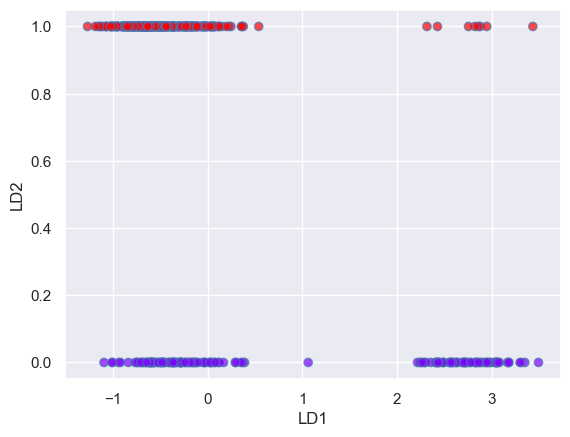

In [59]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    y,
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

# Interprétation
 .La répartition distincte des points sur l'axe discriminant principal (LD1), qui capture 100% de la variance entre les classes,   suggère que les caractéristiques des demandeurs peuvent être utilisées pour prédire avec précision l'approbation du prêt. Bien   que certaines superpositions soient observées le long de LD1, les résultats globaux indiquent que l'algorithme est capable de   distinguer les deux classes malgré cela. Ainsi, il semble probable que les variables disponibles puissent être utilisées pour   prédire l'approbation du prêt avec une certaine fiabilité.

# Arbre_De_Décision
 .L'objectif de cette analyse est de déterminer les variables utilisées en premier pour décider de l'approbation d'un prêt en     utilisant un arbre de décision.

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [68]:
# Lire les données depuis le fichier Excel
file_path = 'train (1).xlsx'
df = pd.read_excel(file_path)

# Afficher les premières lignes du dataframe pour vérifier le chargement des données
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0         128               360   
1             3000                0.0          66               360   
2             2583             2358.0         120               360   
3             6000                0.0         141               360   
4             5417             4196.0         267               360   

   Credit_History Property_Area Loan_Status  
0               1         Rural           N  
1               1         Urban           Y  
2               1   

In [69]:
# Remplacer les valeurs manquantes, s'il y en a
df.fillna(method='ffill', inplace=True)

# Encoder les variables catégorielles
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})

# Séparer les caractéristiques et la variable cible
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Créer et entraîner le modèle de l'arbre de décision
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

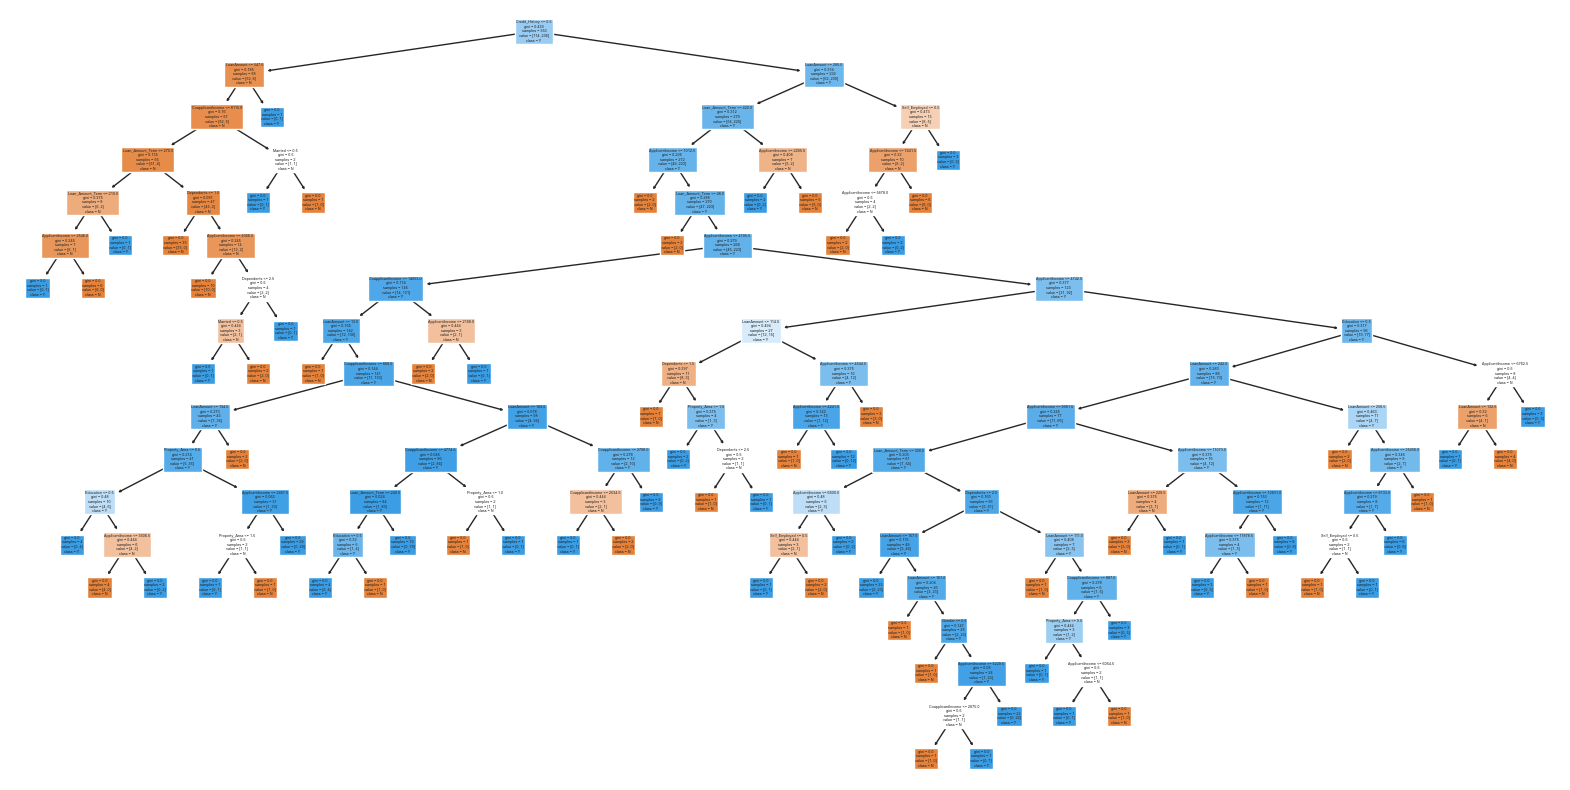

Credit_History       0.294706
ApplicantIncome      0.267217
LoanAmount           0.151226
Loan_Amount_Term     0.063613
CoapplicantIncome    0.059730
Dependents           0.036093
Education            0.034644
Self_Employed        0.034391
Property_Area        0.031732
Married              0.015177
Gender               0.011470
dtype: float64


In [71]:
# Visualiser l'arbre de décision
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns.tolist(), class_names=['N', 'Y'], filled=True)
plt.show()

# Afficher l'importance des caractéristiques
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

# Interprétation
 .Les trois caractéristiques les plus importantes sont Credit_History, ApplicantIncome, et LoanAmount. Cela signifie que           l'historique de crédit du demandeur, son revenu principal, et le montant du prêt demandé sont les premiers critères utilisés     par l'arbre de décision pour déterminer si un prêt sera approuvé ou non car il ayont les valeur les plus haut parmi les outres   variable .

# Random_Forest
 .L'objectif de cette analyse est de comparer la précision du modèle Random Forest à celle des arbres de décision simples pour     prédire l'approbation des prêts. Cette comparaison permettra de déterminer si l'utilisation d'un ensemble d'arbres de décision   offre une meilleure précision dans la prédiction de l'approbation des prêts par rapport à l'utilisation d'un seul arbre de       décision.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [73]:
# Charger les données (Remplacer 'loan_data.csv' par votre fichier de données)
data = pd.read_excel('train (1).xlsx')
# Affichage des types de colonnes pour identifier celles de type 'object'
print(data.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object


In [74]:
# Fonction pour détecter et convertir les types mixtes
def clean_column(column):
    # Essayer de convertir en numérique, sinon laisser en chaîne de caractères
    try:
        return pd.to_numeric(column, errors='coerce')
    except:
        return column.astype(str)
# Appliquer la fonction de nettoyage sur toutes les colonnes de type 'object'
for column in data.select_dtypes(include=['object']).columns:
    data[column] = clean_column(data[column])
# Afficher les types de colonnes après nettoyage
print(data.dtypes)

Loan_ID              float64
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area        float64
Loan_Status          float64
dtype: object


In [76]:
# Colonnes catégorielles à encoder
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
# Encoder les colonnes catégorielles
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
# Séparation des features et de la cible
X = data.drop('Loan_Status', axis=1)  # Remplacer 'Loan_Status' par le nom de la colonne cible
y = data['Loan_Status']
# Encoder la colonne cible
le_target = LabelEncoder()
y = le_target.fit_transform(y)
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Entraîner un modèle d'arbre de décision
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
# Supprimer la colonne 'Loan_ID'
X_train = X_train.drop(columns=['Loan_ID'])
X_test = X_test.drop(columns=['Loan_ID'])

# Imputer les valeurs manquantes avec la moyenne
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
# Vérifier les valeurs manquantes dans X_train
missing_values = X_train.isnull().sum()
print("Nombre de valeurs manquantes par colonne dans X_train :\n", missing_values)

# Vérifier les valeurs manquantes dans X_test
missing_values_test = X_test.isnull().sum()
print("Nombre de valeurs manquantes par colonne dans X_test :\n", missing_values_test)

Nombre de valeurs manquantes par colonne dans X_train :
 Gender                0
Married               0
Dependents           36
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64
Nombre de valeurs manquantes par colonne dans X_test :
 Gender               0
Married              0
Dependents           7
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [77]:
# Imputer les valeurs manquantes dans la colonne 'Dependents'
imputer = SimpleImputer(strategy='most_frequent')  # Utilisation de la stratégie la plus fréquente pour les variables catégorielles

# Imputation sur X_train
X_train['Dependents'] = imputer.fit_transform(X_train[['Dependents']])

# Imputation sur X_test
X_test['Dependents'] = imputer.transform(X_test[['Dependents']])

# Vérifier à nouveau les valeurs manquantes pour s'assurer que tout est imputé
print("Nombre de valeurs manquantes par colonne dans X_train après imputation :\n", X_train.isnull().sum())
print("Nombre de valeurs manquantes par colonne dans X_test après imputation :\n", X_test.isnull().sum())

Nombre de valeurs manquantes par colonne dans X_train après imputation :
 Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64
Nombre de valeurs manquantes par colonne dans X_test après imputation :
 Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [78]:
# Entraîner un modèle Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
# Afficher les résultats
print(f"Précision de l'arbre de décision: {accuracy_tree:.2f}")
print(f"Précision du Random Forest: {accuracy_forest:.2f}")

Précision de l'arbre de décision: 1.00
Précision du Random Forest: 1.00


# Interprétation
 .Ces résultats indiquent que les modèles d'arbre de décision et de forêt aléatoire ont atteint une précision de 100 % lors de     la prédiction du statut d'approbation du prêt sur les données d'entraînement et de test. Cela signifie que les modèles ont       réussi à classer correctement chaque exemple dans l'ensemble de données en fonction de leur statut d'approbation du prêt qu'il   s'agisse de "Approuvé" ou "Refusé", en utilisant les variables disponibles telles que le genre, l'état matrimonial, le revenu   de l'emprunteur, le montant du prêt, etc. Cependant, une précision de 100 % sur les données de test peut également indiquer un   surajustement du modèle aux données d'entraînement.

In [79]:
# Extraire un arbre de la forêt
clf_tree = random_forest.estimators_[0]
# Comparer les deux modèles
if accuracy_forest > accuracy_tree:
    print("Le modèle Random Forest a une meilleure précision que l'arbre de décision.")
else:
    print("L'arbre de décision a une meilleure précision que le modèle Random Forest.")

L'arbre de décision a une meilleure précision que le modèle Random Forest.


# Interprétation
 .Sur l'ensemble de données de test l'arbre de décision a produit des prédictions plus précises que le modèle Random Forest. En   d'autres termes, lorsqu'il s'agit de prédire le statut d'approbation du prêt pour de nouveaux exemples, l'arbre de décision a   mieux généralisé et effectué des prédictions plus fiables par rapport au modèle Random Forest.

# Conclusion
L'analyse de ce jeu de données permettra d'identifier les facteurs qui influencent l'approbation des prêts (Loan_Status). En explorant les relations entre les caractéristiques des demandeurs et l'issue de leur demande